In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#load the dataset
df = pd.read_csv("/content/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#check the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
#handling the missing value in the dataset
missing_data = df.isnull().sum()
missing_data

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
df['cabin'].fillna(df['cabin'].mode(), inplace=True)

In [ ]:
df['body'].fillna(df['body'].median(), inplace=True)

In [ ]:
df['boat'].fillna(df['boat'].mode(), inplace=True)

In [ ]:
df['home.dest'].fillna(df['home.dest'].mode(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       1310 non-null   float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
#handling the missing value in the dataset
missing_data = df.isnull().sum()
missing_data

pclass         1
survived       1
name           1
sex            1
age            0
sibsp          1
parch          1
ticket         1
fare           2
embarked       3
boat         824
body           0
home.dest    565
dtype: int64

In [ ]:
# Drop the 'Cabin' column
#df.drop(columns='cabin', inplace=True) #(already dropped)

In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [ ]:
df['fare'].fillna(df['fare'].median(), inplace=True)

In [ ]:
#remove the duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [ ]:
#correct the datatypes
df['survived'] = df['survived'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [ ]:
#feature engineering
#Family Size: Combine SibSp and Parch to create a FamilySize feature.
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

In [ ]:
#Title Extraction: Extract titles from names and create a new feature.
df['Title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
#Bucket Ages: Create age groups.
df['AgeGroup'] = pd.cut(df['age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])


In [ ]:
#Standardize or Normalize Data
#For numerical variables that will be used in modeling, consider standardization or normalization.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

In [ ]:
#Final Check
#After cleaning, perform a final check to ensure there are no remaining issues

print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      1309 non-null   float64 
 1   survived    1309 non-null   category
 2   name        1309 non-null   object  
 3   sex         1309 non-null   category
 4   age         1310 non-null   float64 
 5   sibsp       1309 non-null   float64 
 6   parch       1309 non-null   float64 
 7   ticket      1309 non-null   object  
 8   fare        1310 non-null   float64 
 9   embarked    1310 non-null   category
 10  boat        486 non-null    object  
 11  body        1310 non-null   float64 
 12  home.dest   745 non-null    object  
 13  FamilySize  1309 non-null   float64 
 14  Title       1309 non-null   object  
 15  AgeGroup    1310 non-null   category
dtypes: category(4), float64(7), object(5)
memory usage: 128.6+ KB
None
pclass          1
survived        1
name            1
sex        

#EDA

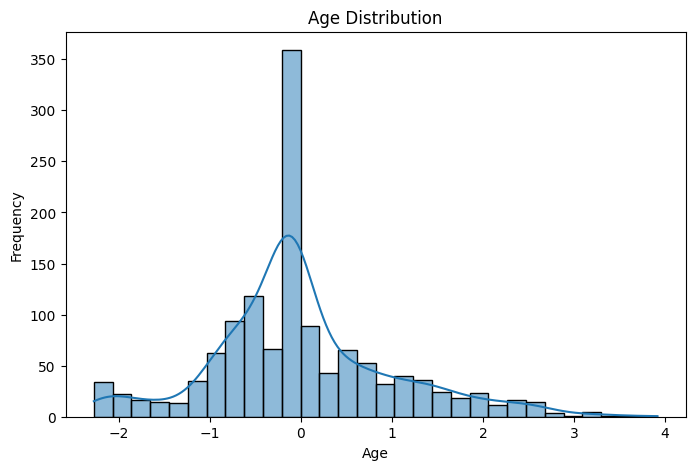

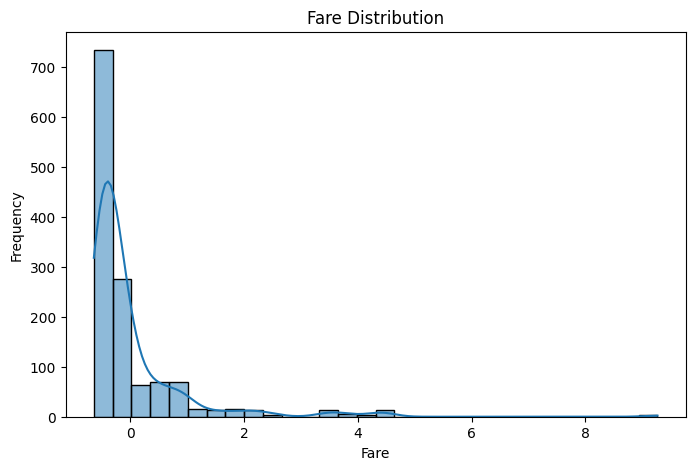

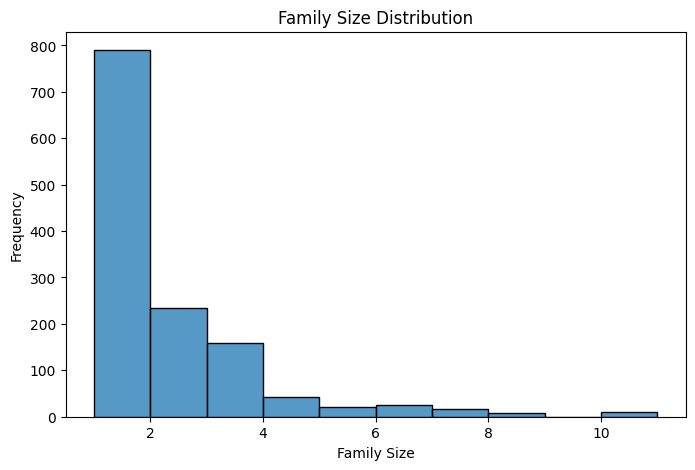

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of fare
plt.figure(figsize=(8, 5))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of family size
plt.figure(figsize=(8, 5))
sns.histplot(df['FamilySize'], bins=10, kde=False)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()


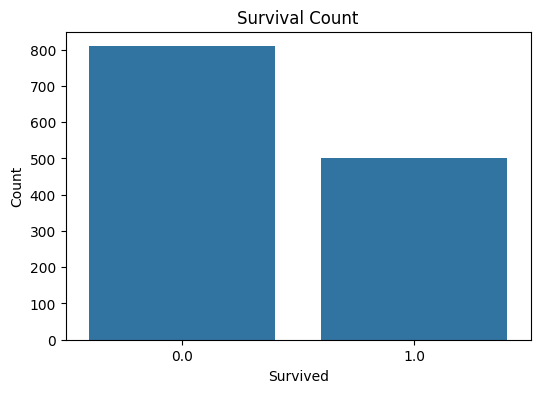

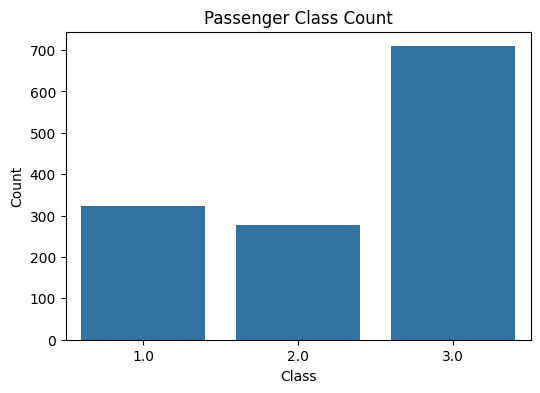

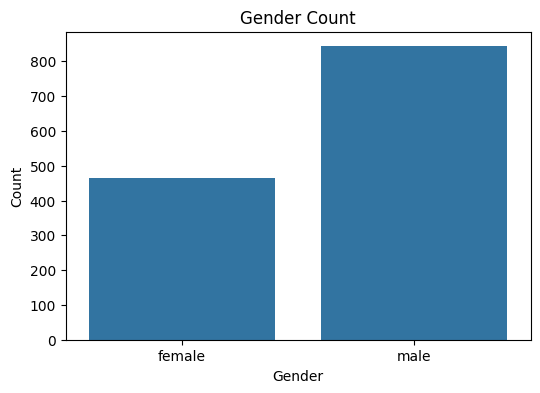

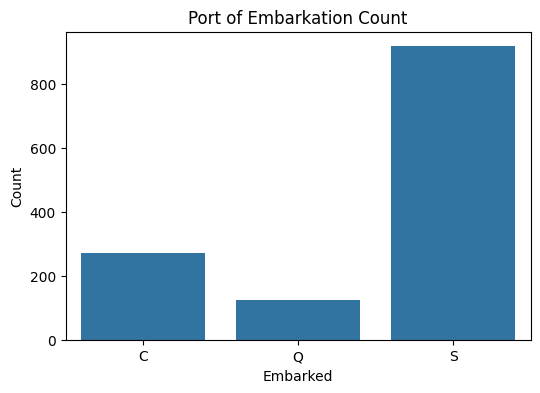

In [ ]:
# Plot count of survived
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot count of pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot count of sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot count of embarked
plt.figure(figsize=(6, 4))
sns.countplot(x='embarked', data=df)
plt.title('Port of Embarkation Count')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


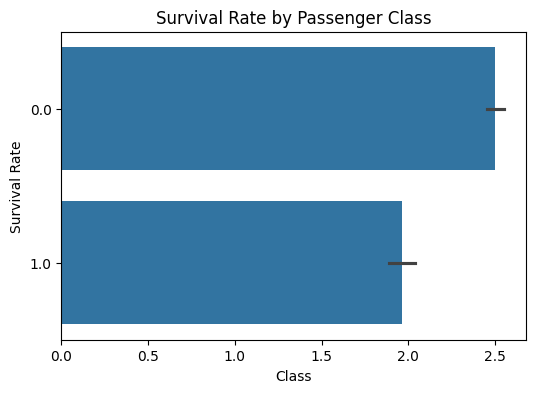

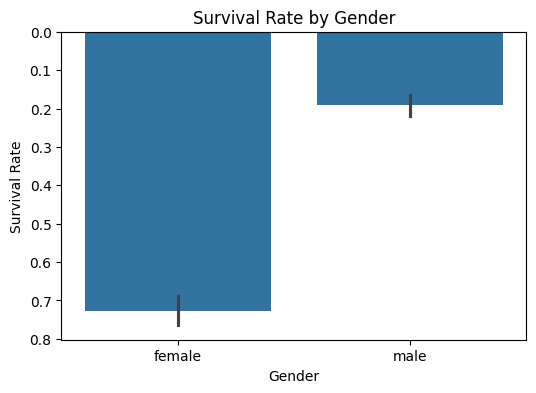

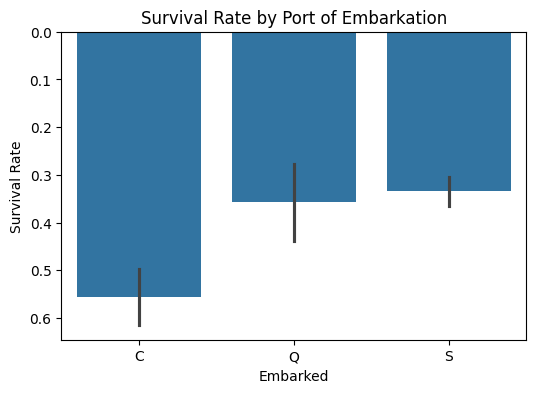

In [ ]:
# Survival rate by passenger class
plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by port of embarkation
plt.figure(figsize=(6, 4))
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


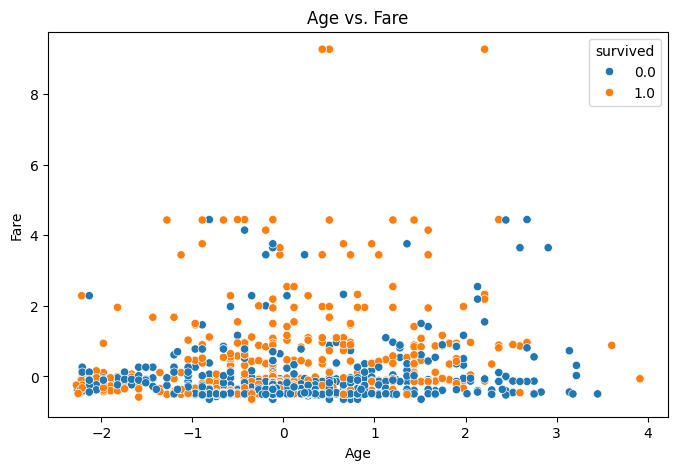

In [ ]:
# Scatter plot of age vs. fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


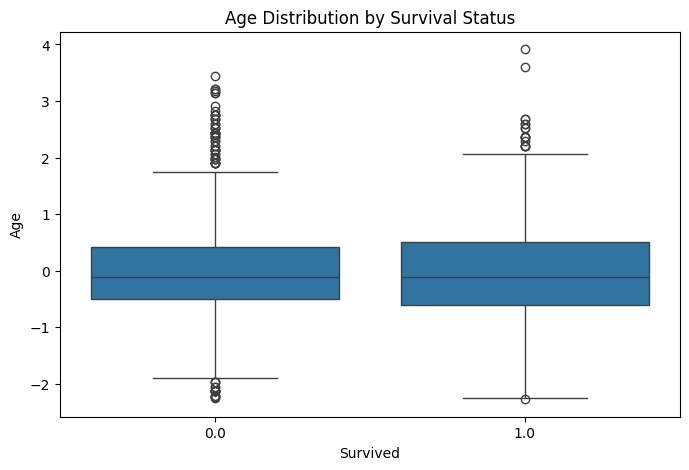

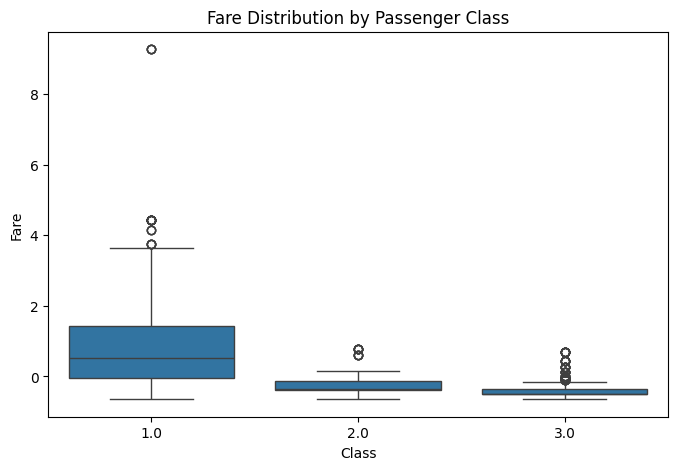

In [ ]:
# Box plot of age by survival status
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Box plot of fare by passenger class
plt.figure(figsize=(8, 5))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()


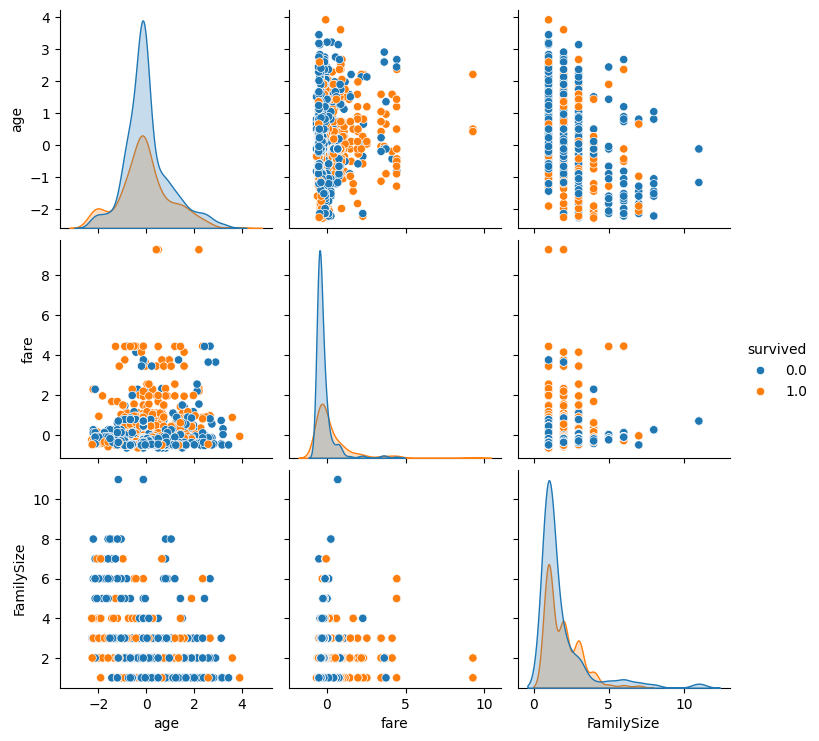

In [ ]:
# Pair plot of selected features
sns.pairplot(df, hue='survived', vars=['age', 'fare', 'FamilySize'])
plt.show()

#patterns and trends